# Prueba Técnica - Ingeniero de datos en NEQUI

**Aspirante:** Edwar Mauricio Mayorga Llanos  
**Ciudad Origen:** Neiva - Huila  
**Lenguaje utilizado:** Python

## **Dataset:** [Trip History Data](https://s3.amazonaws.com/capitalbikeshare-data/index.html) 

[Capital Bikeshare](https://capitalbikeshare.com/) es una empresa que su principal fuente de ingresos es el alquiler de bicicletas electricas en la ciudad de Wachinton DC.

Se trata de un dataset que contiene la informacion acerca de los viajes recopilados de periodos anteriores.

Los datos incluyen:

- **Duración:** Duración del viaje  
- **Fecha de inicio:** Incluye la fecha y hora de inicio  
- **Fecha de finalización:** Incluye la fecha y hora de finalización  
- **Estación de inicio:** Incluye el nombre y número de la estación de inicio  
- **Estación de finalización:** Incluye el nombre y número de la estación de finalización  
- **Número de bicicleta:** Incluye el número de identificación de la bicicleta utilizada para el viaje  
- **Tipo de miembro:** Indica si el usuario era:
  - Un miembro "registrado" (Miembro anual, Miembro de 30 días o Miembro de llave diaria)
  - Un ciclista "casual" (Viaje único, Pase de 24 horas, Pase de 3 días o Pase de 5 días)

## Paso 1: Alcance del proyecto y captura de datos
### Captura y unificacion de datasets

## Casos de uso

1. Análisis exploratorio: Quiero investigar patrones de uso de las bicicletas en la ciudad. Ejemplo:
   - ¿Qué estación de origen y destino se utiliza más?
   - ¿Qué días son de mayor demanda?
   - ¿En qué rango de horas se utiliza más el servicio?
   - ¿Quién usa más el servicio (miembros o ciclistas casuales)?</br></br>
2. Base de datos de fuente de verdad sobre:
   - Almacenar datos sobre los viajes de Capital Bikeshare

## Paso 2: Explorar y evaluar los datos, el EDA
### Captura y unificacion de datasets

In [1]:
import os
import pandas as pd

carpeta = 'data'
archivos = os.listdir(carpeta)

dfs = []

for archivo in archivos:
    ruta_archivo = os.path.join(carpeta, archivo)
    if os.path.isfile(ruta_archivo):
        df_temp = pd.read_csv(ruta_archivo)
        dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

In [2]:
print("Número total de registros: ", df.shape[0])

Número total de registros:  1091341


## Exploracion inicial

### Vemos algunos datos de muestra y los nombres de las columnas.

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65F0ACD101BF0D49,classic_bike,2023-01-04 19:34:07,2023-01-04 19:39:29,East Falls Church Metro / Sycamore St & 19th St N,31904.0,W Columbia St & N Washington St,32609.0,38.885321,-77.156427,38.885621,-77.166917,member
1,D75158CE73DC43F0,classic_bike,2023-01-27 15:26:38,2023-01-27 19:21:36,Carroll & Westmoreland Ave,32025.0,Fenton St & Ellsworth Dr,32036.0,38.975000,-77.011210,38.997033,-77.025608,member
2,33E85889625FF7CA,classic_bike,2023-01-05 20:44:38,2023-01-05 20:51:18,15th & L St NW,31276.0,Thomas Circle,31241.0,38.903649,-77.034918,38.905900,-77.032500,member
3,E1F055A1651F47A1,classic_bike,2023-01-03 17:45:14,2023-01-03 17:57:23,Hartland Rd & Harte Pl,32255.0,Merrifield Cinema & Merrifield Town Center,32235.0,38.878601,-77.222808,38.870093,-77.229970,member
4,88CC90CEEC298BAF,classic_bike,2023-01-03 05:18:46,2023-01-03 05:25:50,Merrifield Cinema & Merrifield Town Center,32235.0,Hartland Rd & Harte Pl,32255.0,38.870093,-77.229970,38.878601,-77.222808,member


### Con el info observamos el tipo de dato de la columna, el total de filas del df, si contiene alguna fila nula en su totalidad, **aunque** puede tener datos nulos internos cada columna.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091341 entries, 0 to 1091340
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1091341 non-null  object 
 1   rideable_type       1091341 non-null  object 
 2   started_at          1091341 non-null  object 
 3   ended_at            1091341 non-null  object 
 4   start_station_name  1028917 non-null  object 
 5   start_station_id    1028917 non-null  float64
 6   end_station_name    1023719 non-null  object 
 7   end_station_id      1023719 non-null  float64
 8   start_lat           1091341 non-null  float64
 9   start_lng           1091341 non-null  float64
 10  end_lat             1089686 non-null  float64
 11  end_lng             1089686 non-null  float64
 12  member_casual       1091341 non-null  object 
dtypes: float64(6), object(7)
memory usage: 108.2+ MB


### Mostrare como estadisticas descriptivas de la columanas numericas

In [5]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,1.028917e+06,1.023719e+06,1.091341e+06,1.091341e+06,1.089686e+06,1.089686e+06
mean,3.136837e+04,3.136905e+04,3.890287e+01,-7.703129e+01,3.890188e+01,-7.703098e+01
std,2.690992e+02,2.707434e+02,2.539424e-02,3.235538e-02,2.512133e-02,3.213795e-02
min,3.020000e+04,3.020000e+04,3.877000e+01,-7.739000e+01,3.871000e+01,-7.747000e+01
25%,3.121200e+04,3.121400e+04,3.889086e+01,-7.704368e+01,3.889054e+01,-7.704368e+01
50%,3.127700e+04,3.127600e+04,3.890267e+01,-7.703150e+01,3.890206e+01,-7.703000e+01
75%,3.160600e+04,3.160900e+04,3.891305e+01,-7.701347e+01,3.891260e+01,-7.701237e+01
max,3.320000e+04,3.320000e+04,3.913000e+01,-7.682000e+01,3.913000e+01,-7.682000e+01


### Veremos cuantas datos nulos tienen las columnas internamente

In [6]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    62424
start_station_id      62424
end_station_name      67622
end_station_id        67622
start_lat                 0
start_lng                 0
end_lat                1655
end_lng                1655
member_casual             0
dtype: int64

### y si tienen datos duplicados

In [7]:
df.duplicated().sum()

0

## Limpieza de datos  
Identificamos que los registros tienen problema con el formato de fecha y bastantes registros con valores nulos, como queremos trabajar con datos completos, **borraré** los datos que contengan algun datos vacio y se **regulara** el formato de fecha.

> Creamos una copia del df original para no afectarlo.

In [8]:
import logging

logging.basicConfig(filename='app.log', level=logging.INFO)

try:
    df_clean = df.copy()
    
    df_clean.dropna(inplace=True)
    
    df_clean['started_at'] = pd.to_datetime(df_clean['started_at'])
    df_clean['ended_at'] = pd.to_datetime(df_clean['ended_at'])
    
except Exception as e:
    logging.error(e)
    print("Ha ocurrido un error, por favor revisa el log para más detalles.")

### Verificamos la limpieza

In [9]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65F0ACD101BF0D49,classic_bike,2023-01-04 19:34:07,2023-01-04 19:39:29,East Falls Church Metro / Sycamore St & 19th St N,31904.0,W Columbia St & N Washington St,32609.0,38.885321,-77.156427,38.885621,-77.166917,member
1,D75158CE73DC43F0,classic_bike,2023-01-27 15:26:38,2023-01-27 19:21:36,Carroll & Westmoreland Ave,32025.0,Fenton St & Ellsworth Dr,32036.0,38.975000,-77.011210,38.997033,-77.025608,member
2,33E85889625FF7CA,classic_bike,2023-01-05 20:44:38,2023-01-05 20:51:18,15th & L St NW,31276.0,Thomas Circle,31241.0,38.903649,-77.034918,38.905900,-77.032500,member
3,E1F055A1651F47A1,classic_bike,2023-01-03 17:45:14,2023-01-03 17:57:23,Hartland Rd & Harte Pl,32255.0,Merrifield Cinema & Merrifield Town Center,32235.0,38.878601,-77.222808,38.870093,-77.229970,member
4,88CC90CEEC298BAF,classic_bike,2023-01-03 05:18:46,2023-01-03 05:25:50,Merrifield Cinema & Merrifield Town Center,32235.0,Hartland Rd & Harte Pl,32255.0,38.870093,-77.229970,38.878601,-77.222808,member


In [10]:
df_clean.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997572 entries, 0 to 1091340
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             997572 non-null  object        
 1   rideable_type       997572 non-null  object        
 2   started_at          997572 non-null  datetime64[ns]
 3   ended_at            997572 non-null  datetime64[ns]
 4   start_station_name  997572 non-null  object        
 5   start_station_id    997572 non-null  float64       
 6   end_station_name    997572 non-null  object        
 7   end_station_id      997572 non-null  float64       
 8   start_lat           997572 non-null  float64       
 9   start_lng           997572 non-null  float64       
 10  end_lat             997572 non-null  float64       
 11  end_lng             997572 non-null  float64       
 12  member_casual       997572 non-null  object        
dtypes: datetime64[ns](2), float64(6),

## Paso 3: Definir el modelo de datos

El modelo de datos conceptuales manejaria el esquema estrella, es util para este ejemplo y se asemeja mucho a las bodegas de datos, en ese sentido, mentendria una tabla grande tipo Factless, donde tendria la informacion de los viajes. Dimensionaria a los clientes, estaciones, tipos de bicicletas y tipo de cliente.

> Eleji el modelo por la simplicidad y comprension, escalabilidad y analisis multidimensional.

### Tabla de hechos (trip_facts)
| Columna           | Descripción                                                        |
|-------------------|--------------------------------------------------------------------|
| ride_id           | Clave principal del viaje                                          |
| started_at        | Fecha y hora de inicio del viaje                                   |
| ended_at          | Fecha y hora de finalización del viaje                             |
| start_station_id  | Clave foránea a la dimensión stations para la estación de in icio  |
| end_station_id    | Clave foránea a la dimensión stations para la estación de     fin  |
| rideable_id       | Clave foránea a la dimensión bike_types para el tipo de bicicleta  |
| member_id         | Clave foránea a la dimensión customer_types para el tipo deliente  |ypes  |

### Dimensión stations

| Columna       | Descripción                            |
|---------------|----------------------------------------|
| station_id    | Clave principal de la estación         |
| station_name  | Nombre de la estación                  |
| station_lat   | Latitud de la ubicación de la estación |
| station_lng   | Longitud de la ubicación de la estación|

### Dimensión bike_types

| Columna       | Descripción                           |
|---------------|---------------------------------------|
| rideable_id   | Clave principal del tipo de bicicleta |
| rideable_type | Nombre del tipo de bicicleta          |

### Dimensión member_type

| Columna           | Descripción                                   |
|-------------------|-----------------------------------------------|
| member_id         | Clave principal del tipo de cliente           |
| member_type       | Tipo de cliente (miembro o casual)            |

![DIAGRAMA UML](images/uml.png)

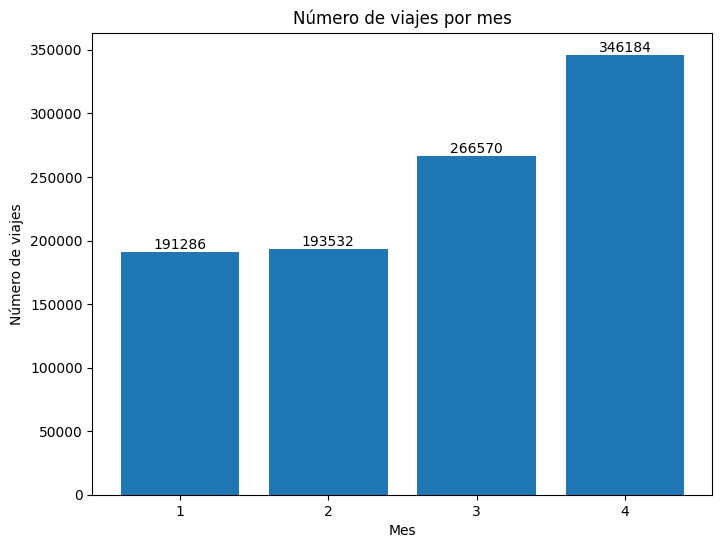

In [12]:
import matplotlib.pyplot as plt

try:
    df_clean['start_month'] = df_clean['started_at'].dt.month
    
    trips_per_month = df_clean['start_month'].value_counts().sort_index()
    
    plt.figure(figsize=(8, 6))
    plt.bar(trips_per_month.index, trips_per_month.values)
    plt.xlabel('Mes')
    plt.ylabel('Número de viajes')
    plt.title('Número de viajes por mes')
    plt.xticks(range(1, 5))
    
    for i, value in enumerate(trips_per_month.values):
        plt.text(trips_per_month.index[i], value, str(value), ha='center', va='bottom')
    
    plt.show()

except Exception as e:
    
    logging.error(e)
    print("Ha ocurrido un error, por favor revisa el log para más detalles.")

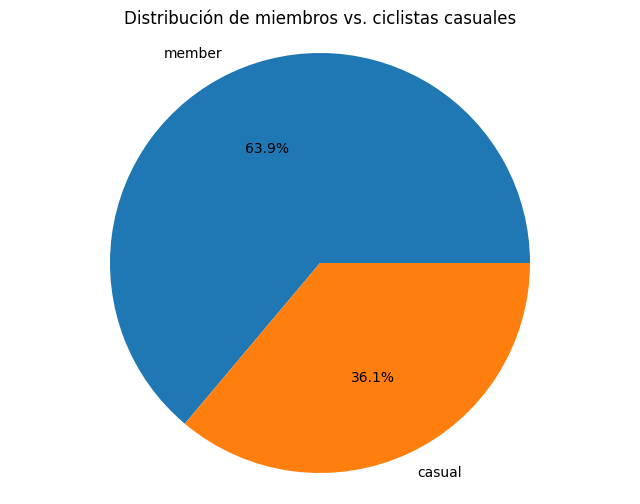

In [13]:
try:
    member_counts = df_clean['member_casual'].value_counts()
    
    plt.figure(figsize=(8, 6))
    plt.pie(member_counts, labels=member_counts.index, autopct='%1.1f%%')
    plt.title('Distribución de miembros vs. ciclistas casuales')
    plt.axis('equal')    
    plt.show()
    
except Exception as e:
    
    logging.error(e)
    print("Ha ocurrido un error, por favor revisa el log para más detalles.")

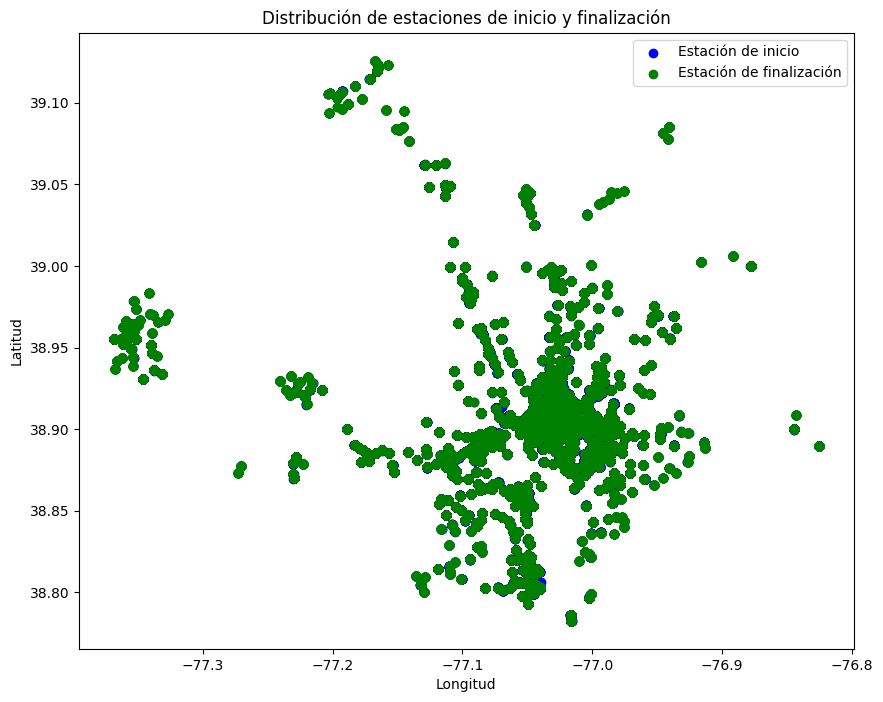

In [14]:
try:
    plt.figure(figsize=(10, 8))
    plt.scatter(df_clean['start_lng'], df_clean['start_lat'], label='Estación de inicio', color='blue')
    plt.scatter(df_clean['end_lng'], df_clean['end_lat'], label='Estación de finalización', color='green')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.title('Distribución de estaciones de inicio y finalización')
    plt.legend()
    plt.show()
    
except Exception as e:
    
    logging.error(e)
    print("Ha ocurrido un error, por favor revisa el log para más detalles.")

## Mapa Washington D. C.
![DIAGRAMA UML](images/mapa_wdc.png)

- ### Sobre arquitectura no conozco mucho de esta, pero lo que investigue diria que una buena opcion seria utilizar arquitectuctura en la nube por escalabilidad.

- ### Los recursos que use fueron Pandas para el procesamiento de datos y para las visualizaciones Matplotlib.

- ### El motivo que utilice pandas es porque es una libreria poderosa para trabajar con el analisis y manipulacion de datos. Asi mimos Matplotlib es un gran generador de grafiscos para Data Visualization.

### Tecnologias del proyecto:

    - Python
    - Jupyter Notebook
    - Pandas
    - Matplotlib

- ### La frecuencia de actualizacion de los datos debe ser trimestral cuando se generen nuevos los nuevos archivos por parte de Capital Bikeshare.